# Autoencoder Tutorial

## Introduction

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction or feature extraction. Autoencoders are also used for generating data (e.g., image denoising, image generation).

## Architecture

An autoencoder consists of two main parts:
1. **Encoder**: This part of the network compresses the input into a latent-space representation.
2. **Decoder**: This part of the network reconstructs the input from the latent space representation.

### Encoder

The encoder function, $h = f(x)$, maps the input $x$ to a hidden representation $h$. Mathematically, this can be written as:

$$
h = f(x) = \sigma(Wx + b)
$$

where:
- $W$ is a weight matrix
- $b$ is a bias vector
- $\sigma$ is an activation function (e.g., ReLU, sigmoid)

### Decoder

The decoder function, $\hat{x} = g(h)$, maps the hidden representation $h$ back to the original input space. Mathematically, this can be written as:

$$
\hat{x} = g(h) = \sigma(W'h + b')
$$

where:
- $W'$ is a weight matrix (not necessarily the transpose of $W$)
- $b'$ is a bias vector
- $\sigma$ is an activation function

### Loss Function

The loss function measures the difference between the input $x$ and its reconstruction $\hat{x}$. A common choice is the mean squared error (MSE):

$$
L(x, \hat{x}) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

where $n$ is the number of input features.

## Training the Autoencoder

Training the autoencoder involves minimizing the loss function with respect to the weights and biases of the encoder and decoder. This is typically done using gradient descent.

### Derivatives

Let's derive the gradients for the encoder and decoder weights.

#### Decoder Gradients

For the decoder, the gradient of the loss function with respect to the decoder weights $W'$ is:

$$
\frac{\partial L}{\partial W'} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial W'}
$$

Since $\hat{x} = \sigma(W'h + b')$, we have:

$$
\frac{\partial \hat{x}}{\partial W'} = h \cdot \sigma'(W'h + b')
$$

Thus,

$$
\frac{\partial L}{\partial W'} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot h^T
$$

#### Encoder Gradients

For the encoder, the gradient of the loss function with respect to the encoder weights $W$ is:

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial W}
$$

Since $h = \sigma(Wx + b)$ and $\hat{x} = \sigma(W'h + b')$, we have:

$$
\frac{\partial L}{\partial h} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial h} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T
$$

And,

$$
\frac{\partial h}{\partial W} = x \cdot \sigma'(Wx + b)
$$

Thus,

$$
\frac{\partial L}{\partial W} = [(x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T] \cdot x^T \cdot \sigma'(Wx + b)
$$

### Gradient Descent Update

The weights and biases are updated using the gradients:

$$
W \leftarrow W - \eta \frac{\partial L}{\partial W}
$$

$$
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

where $\eta$ is the learning rate.

##  Example

Let's consider a simple  example using Python and Keras to illustrate how an autoencoder works. We'll use the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits.




11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 5s 17ms/step - loss: 0.2443 - val_loss: 0.1597
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1422 - val_loss: 0.1262
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1181 - val_loss: 0.1085
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1039 - val_loss: 0.0974
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0947 - val_loss: 0.0901
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0885 - val_loss: 0.0850
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0841 - val_loss: 0.0815
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0811 - val_loss: 0.0791
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0791 - val_loss: 0.0774
Epoch 10/50
235/235 [=====

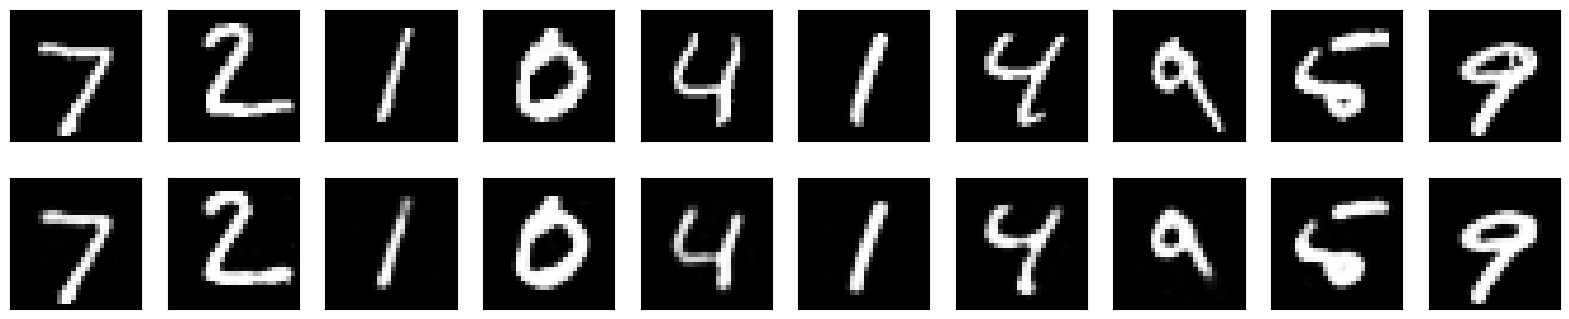

In [ ]:
### Example Data

import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()